In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

#For data Vizualation
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_csv('day.csv') # Import data 

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()   # Finding missing values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.nunique()   # helpful to check which one is numeric and catagorical variable

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
df_drop_colmns= ["instant","dteday"]   # Removing unnecessery columns for model training 
df.drop(df_drop_colmns, inplace=True, axis=1)
df.shape 

(730, 14)

In [9]:
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
num_colmns = ["temp","atemp","hum","windspeed","casual","registered","cnt"]


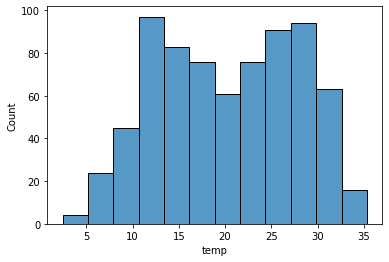

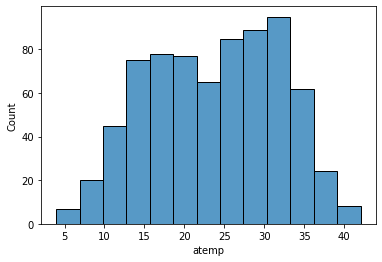

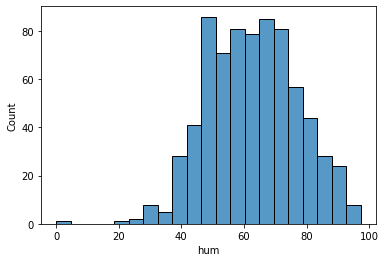

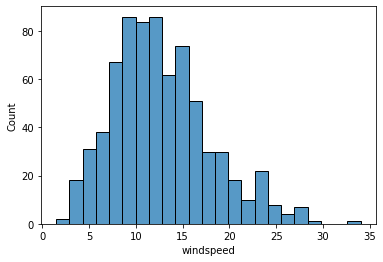

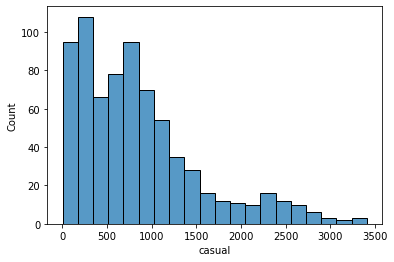

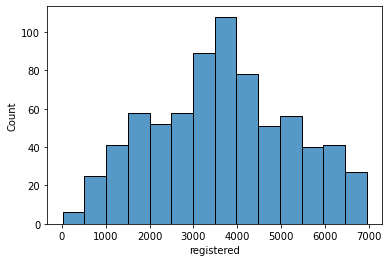

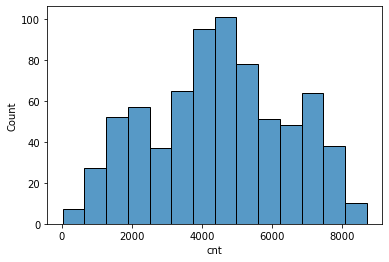

In [12]:
for i in num_colmns:
    sns.histplot(x=df[i])
    plt.show()

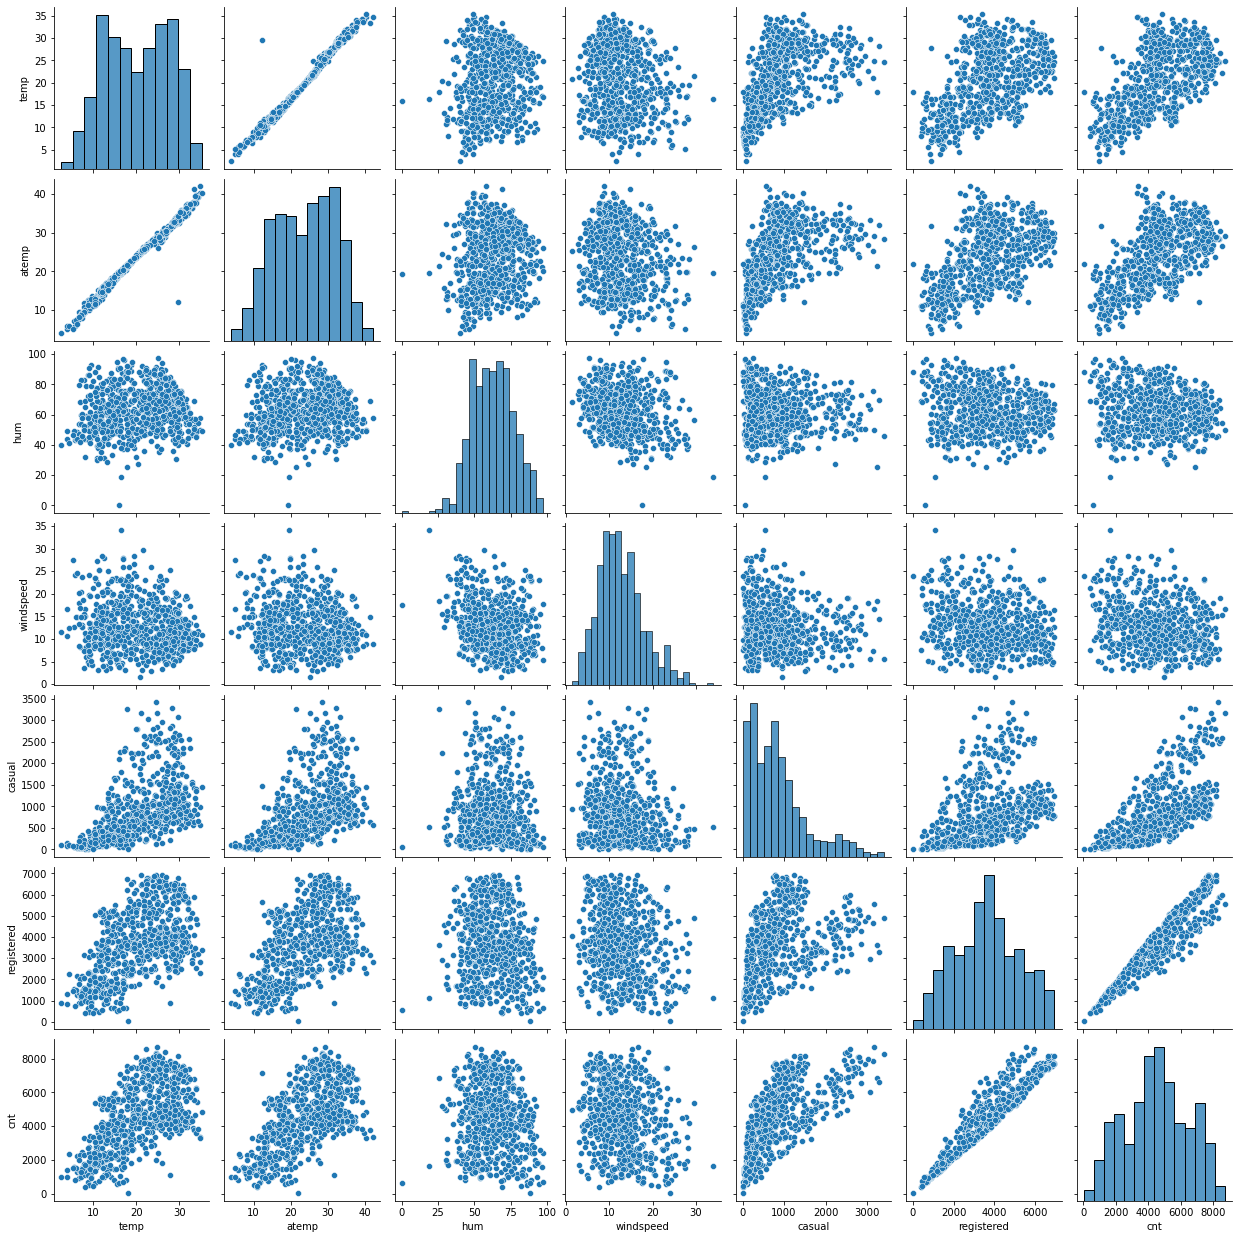

In [13]:
sns.pairplot(df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

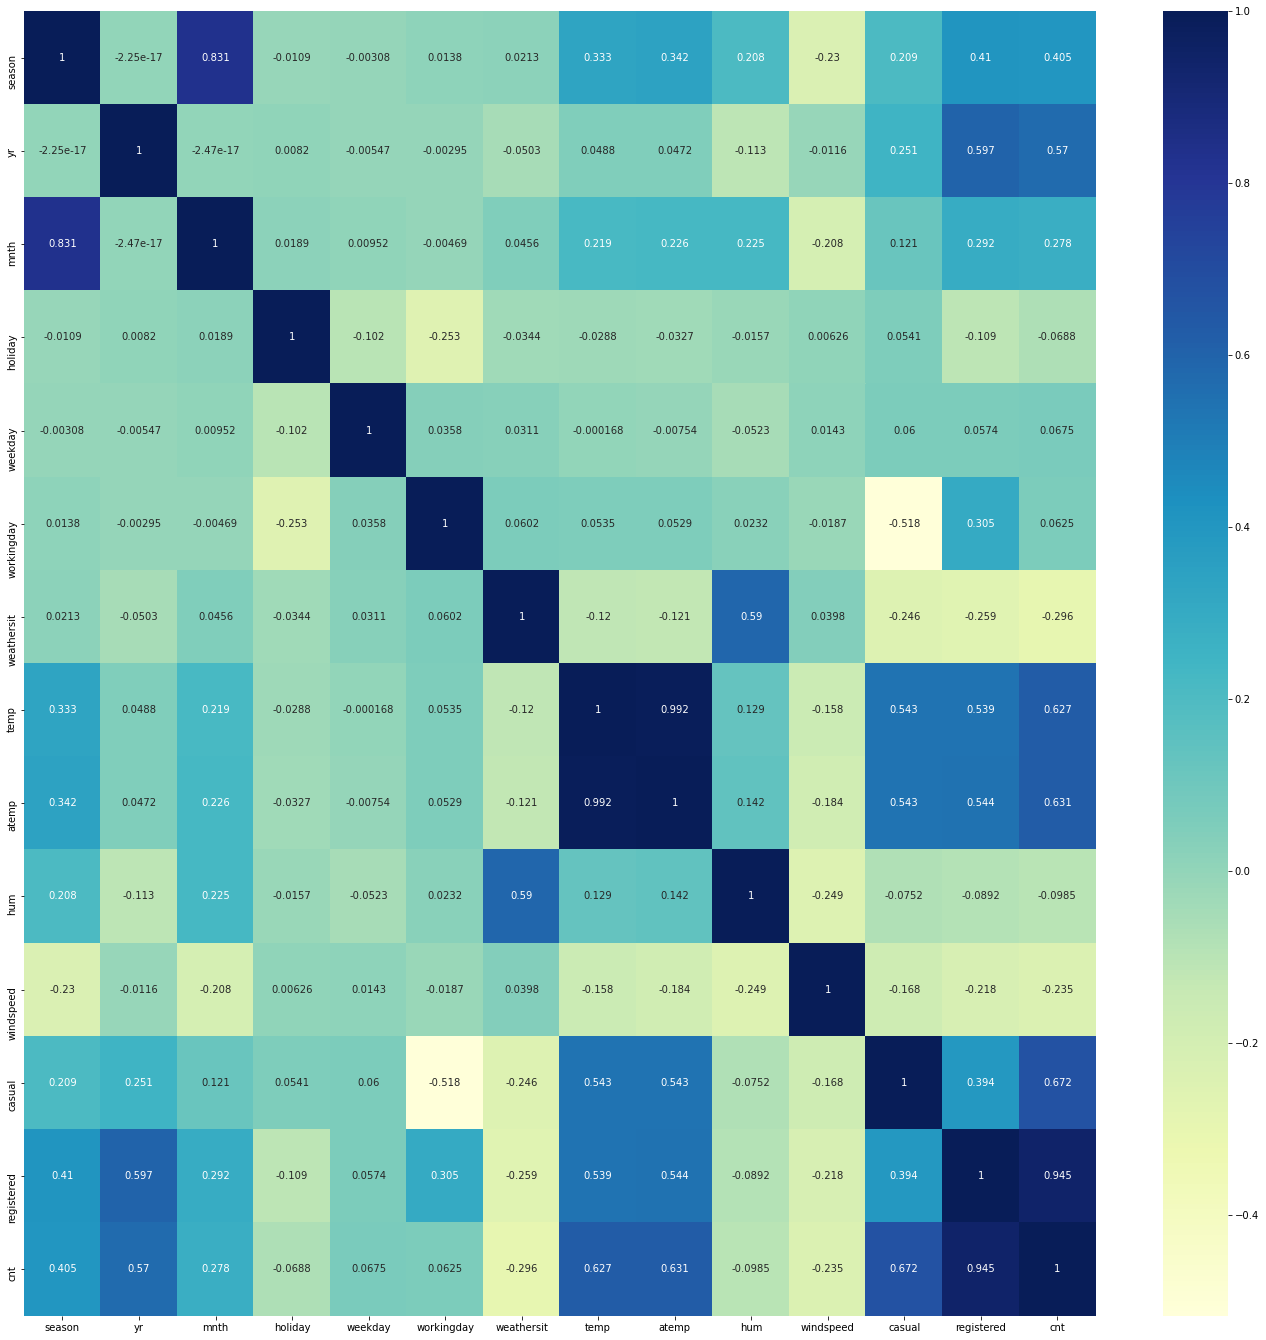

In [14]:
# To get heat map 
plt.figure(figsize = (24, 24))
sns.heatmap(df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

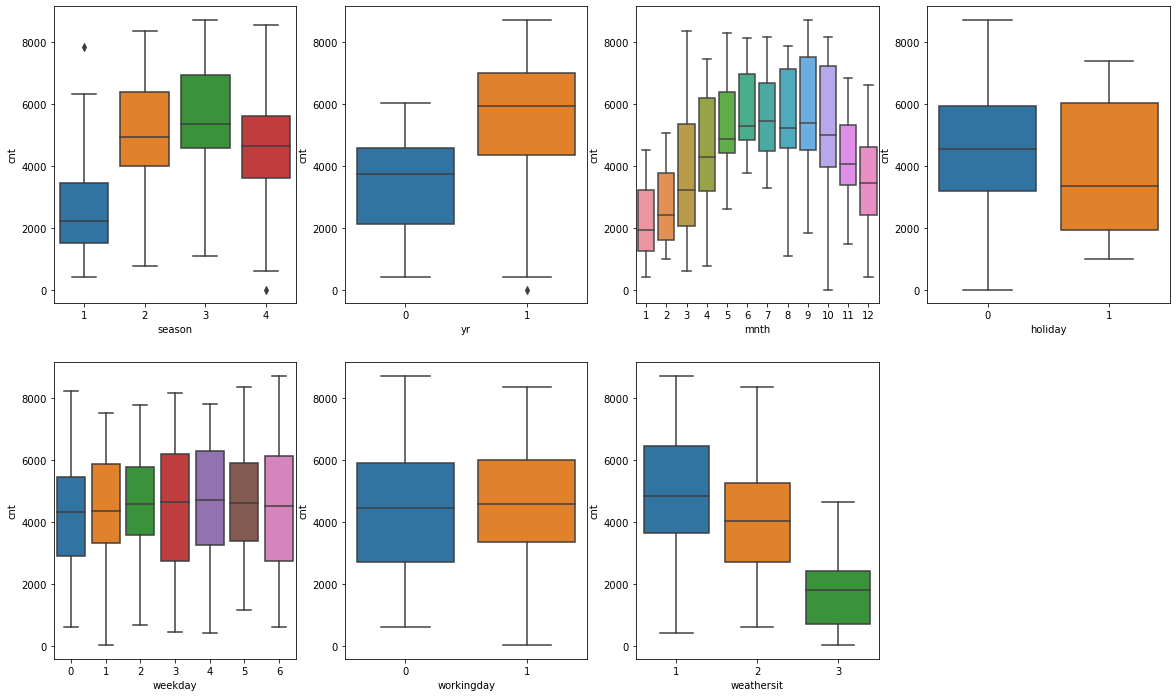

In [15]:
#BoxPlots now for catagorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()


In [16]:
# Data Mapping 

# Defining the season map function
def mapping_season_col(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

df[["season"]] = df[["season"]].apply(mapping_season_col)

In [17]:
# Defining the weather map function
def mapping_weathersit_col(x):
    return x.map({1:"weathersit_1", 2:"weathersit_2", 3:"weathersit_3", 4:"weathersit_4"})


df[["weathersit"]] = df[["weathersit"]].apply(mapping_weathersit_col)

In [18]:
#Defining the month map function
def mapping_month_col(x):
    return x.map({1:"month_1", 
                  2:"month_2", 
                  3:"month_3", 
                  4:"month_4",
                  5:"month_5",
                  6:"month_6",
                  7:"month_7",
                  8:"month_8",
                  9:"month_9",
                  10:"month_10",
                  11:"month_11",
                  12:"month_12"})

df[["mnth"]] = df[["mnth"]].apply(mapping_month_col)



In [19]:
# Defining the weekday map function
def mapping_weekday_col(x):
    return x.map({0:"Monday", 
                  1:"Tuesday", 
                  2:"Wednesday", 
                  3:"Thursday",
                  4:"Friday",
                  5:"Saturday",
                  6:"Sunday"})

df[["weekday"]] = df[["weekday"]].apply(mapping_weekday_col)

In [20]:
# Encoding Dummy Variables

season_dummy_var = pd.get_dummies(df["season"], drop_first = True)


In [21]:
season_dummy_var.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
weathersit_dummy_var = pd.get_dummies(df["weathersit"],drop_first = True)

In [23]:
weathersit_dummy_var.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [24]:
mnth_dummy_var = pd.get_dummies(df["mnth"],drop_first = True)
mnth_dummy_var.head()

,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [25]:
weekday_dummy_var = pd.get_dummies(df["weekday"],drop_first = True)
weekday_dummy_var.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [26]:
df = pd.concat([df, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,month_1,0,Sunday,0,weathersit_2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,month_1,0,Monday,0,weathersit_2,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,month_1,0,Tuesday,1,weathersit_1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,month_1,0,Wednesday,1,weathersit_1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,month_1,0,Thursday,1,weathersit_1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [27]:
drop_these_columns_2 = ["season",
                        "weathersit",
                        "mnth",
                        "weekday",
                        "casual",
                        "registered"]
df.drop(drop_these_columns_2, inplace=True, axis=1)
df.shape

(730, 30)

In [28]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#Training a model 
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.074510,0.076471,0.096078,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.262857,0.266010,0.294988,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Dividing X and Y teains 
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25) # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_10', True, 1),
 ('month_11', True, 1),
 ('month_12', True, 1),
 ('month_2', True, 1),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', True, 1),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 4),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', False, 2),
 ('Wednesday', False, 3)]

In [36]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'weathersit_2', 'weathersit_3',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'Monday',
       'Sunday'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_] ## rejected variables

Index(['Saturday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

In [38]:
# Calculate the VIFs for the new model
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [39]:
#Model-1
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.72e-184
Time:                        19:14:42   Log-Likelihood:                 526.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1902      0.033      5.725   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [40]:
# Model-2
X_train_new = X_train[col].drop(["holiday"], axis = 1) # dropping holiday variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_2.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.72e-184
Time:                        19:14:42   Log-Likelihood:                 526.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1761      0.048      3.673   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [41]:
# Model-3
X_train_new_3 = X_train_new.drop(["atemp"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_3 = sm.add_constant(X_train_new_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_3.summary())

calculate_VIF(col,X_train)

# Model-2
#X_train_new = X_train[col].drop(["holiday"], axis = 1) # dropping holiday variable considering P value from model-1 the variable
# Adding a constant variable 
#X_train_lm = sm.add_constant(X_train_new)
#lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
#print(lm_2.summary())

#calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.49e-185
Time:                        19:14:42   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1758      0.048      3.672   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [42]:
# Model-4
X_train_new_4 = X_train_new_3.drop(["month_7"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_4 = sm.add_constant(X_train_new_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_4.summary())

calculate_VIF(col,X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.46e-186
Time:                        19:14:42   Log-Likelihood:                 526.37
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1846      0.044      4.149   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [43]:
# Model-5
X_train_new_5 = X_train_new_4.drop(["month_11"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_5 = sm.add_constant(X_train_new_5)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_5.summary())

calculate_VIF(col,X_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.38e-187
Time:                        19:14:42   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -915.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1888      0.044      4.326   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [44]:
# Model-6
X_train_new_6 = X_train_new_5.drop(["month_12"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_6 = sm.add_constant(X_train_new_6)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_6.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.04e-188
Time:                        19:14:42   Log-Likelihood:                 526.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1891      0.044      4.337   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [45]:
# Model-7
X_train_new_7 = X_train_new_6.drop(["summer"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_7 = sm.add_constant(X_train_new_7)
lm_7 = sm.OLS(y_train,X_train_lm_7).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_7.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.21e-189
Time:                        19:14:42   Log-Likelihood:                 525.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2071      0.042      4.976   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [46]:
# Model-8
X_train_new_8 = X_train_new_7.drop(["month_2"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_8 = sm.add_constant(X_train_new_8)
lm_8 = sm.OLS(y_train,X_train_lm_8).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_8.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.05e-189
Time:                        19:14:43   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2113      0.042      5.081   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [47]:
# Model-9
X_train_new_9 = X_train_new_8.drop(["Monday"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_9 = sm.add_constant(X_train_new_9)
lm_9 = sm.OLS(y_train,X_train_lm_9).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_9.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          3.91e-190
Time:                        19:14:43   Log-Likelihood:                 522.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2518      0.035      7.221   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [48]:
X_train_new_9.head()

,yr,workingday,temp,hum,windspeed,spring,winter,weathersit_2,weathersit_3,month_10,month_3,month_4,month_5,month_6,month_8,month_9,Sunday
653,1,1,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0,0,0,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,1,0,0,0,1,0,0,0,0,1


In [49]:
# Model-10
X_train_new_10 = X_train_new_9.drop(["workingday"], axis = 1) # dropping atemp variable considering P value from model-1 the variable
# Adding a constant variable 
X_train_lm_10 = sm.add_constant(X_train_new_10)
lm_10 = sm.OLS(y_train,X_train_lm_10).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_10.summary())

calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.45e-186
Time:                        19:14:43   Log-Likelihood:                 511.12
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     493   BIC:                            -916.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2968      0.034      8.663   

,Features,VIF
2,workingday,74.09
3,temp,66.24
4,atemp,55.37
24,Sunday,17.85
23,Monday,16.87
7,spring,10.78
21,month_8,9.96
9,winter,9.50
20,month_7,8.91
8,summer,8.31


In [52]:
y_train_cnt = lm_10.predict(X_train_lm_10)

In [53]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.08881994870356413

Text(0.5, 0, 'Errors')

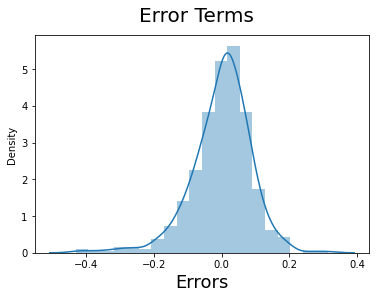

In [54]:
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

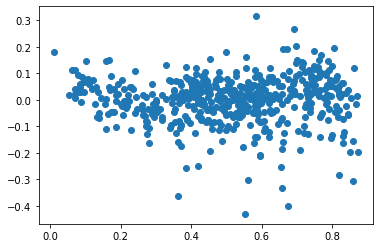

In [55]:
# Patterns in the reciduals 

plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

In [ ]:
#This seems that there is no correlation between the residuals and the predicted values, or among the residuals themselves

In [56]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,1,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,1,0,0,0,0,0,0,0,0,0


In [57]:
#Dividing in to X_test 
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Making predictions
y_pred = lm_10.predict(X_test_new)

Text(0, 0.5, 'y_pred')

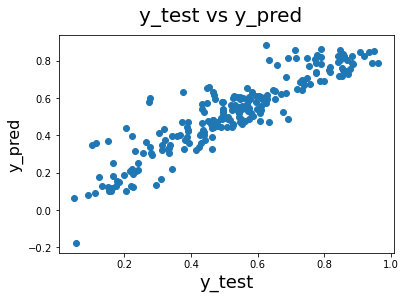

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [64]:
# RMSE 

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09053489306209524

In [66]:
R2 = r2_score(y_test, y_pred)
R2
 

0.8274254680364647

In [67]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.8173725826793655

In [68]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.21e-189
Time:                        20:19:45   Log-Likelihood:                 525.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2071      0.042      4.976   

In [69]:
# So final regression model will be 
# LRE = 0.2071+0.2317*yr+0.0921*workingday+0.4393*temp-0.1485*hum-0.1842*windspeed-0.0764*spring+0.0964winter0.0605*weathersit_2-0.2580*weathersit_3+0.0513*month_10+0.0285*month_2+0.0671*month_3+0.0732*month_4+0.0993*month_5+0.0601*month_6+0.0534*month_8+0.1207*month_9+0.0481*Monday+0.1031*Sunday

In [ ]:
# company should keep in mind the aforementioned predictor variables while preparing bike rental strategy are
## const
# yr
# workingday
# temp
# hum
# windspeed
# spring
# winter
# weathersit_2
# weathersit_3
# month_10
# month_2
# month_3
# month_4
# month_5
# month_6
# month_8
# month_9
# Monday
# Sunday
